# Embedded ML - Lab 1.1: Native implementation of Artificial Neural Netwroks

In this lab you are asked to write the code for an Artificial Neural Network (ANN) without using ML libraries such as SciKit-learn, PyTorch or TensorFlow, but you are allowed to use standard libraries such as math, numpy and matplotlib if needed. You are given some code but you are expected to write some more and be able to explain and modify everything. This is a key foundational exercise for you to understand the efficiency aspects that will be dealt with throughout this course.

### Learning outcomes


* Explain the basic concepts of ANNs
* Implement simple ANNs in Python without using advanced libraries
* Analyze the computational resources demanded when training, running inference and scaling ANNs



### 1. Linear regression
Linear regression is perhaps the simplest form of ML and can be thought of as an ANN with a single neuron. Yet, it can make a linear approximation of an input-output pair of data arrays.

Below is an incomplete code for a Python class that implements a linear regressor. You should **complete the missing code** for the predict() and error() methods and then write a simple implementation of the class.

Dataset A: 
Output:  [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Predictions:  [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
Error:  0.0




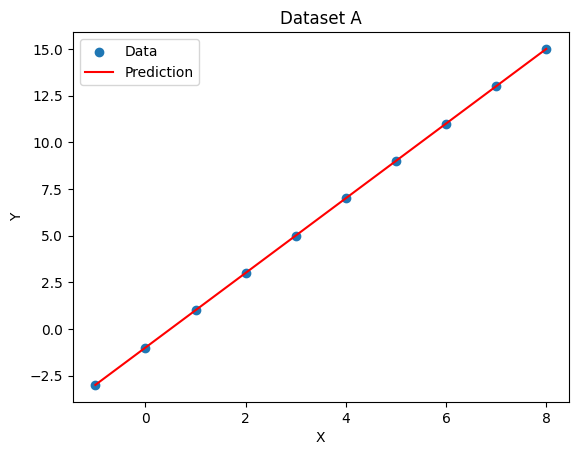

Dataset B: 
Output:  [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
Predictions:  [-17, -11, -7.8, -5, -1, 2.8, 7, 11.4, 15, 22.0]
Error:  77.52207




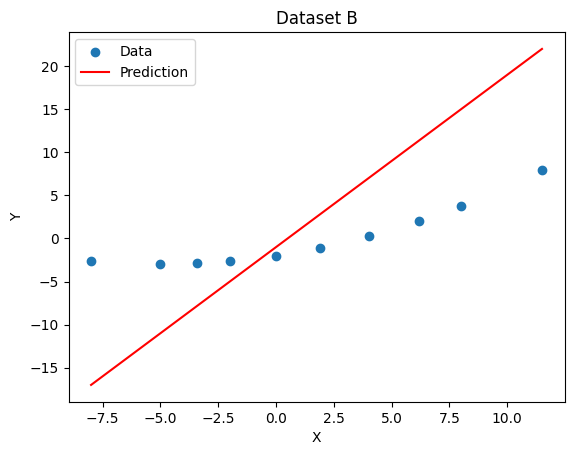

In [15]:
import random

import matplotlib.pyplot as plt
import numpy as np

class LinRegressor:
  def __init__(self, w, b):
    self.w = w
    self.b = b

  def predict(self, x):
    self.myY = []

    # predict all the corresponding Y values from X, using a linear model
    # complete here the missing code...
    for i in range(len(x)):
      self.myY.append(self.w * x[i] + self.b)

    return self.myY

  def error(self, y):
    total_square_error = 0

    # compute the total error using one of the metrics seen
    # complete here the missing code...
    for i in range(len(self.myY)):
      #Squared error
      total_square_error += (y[i] - self.myY[i]) ** 2
    
    #Squared error
    total_square_error /= len(self.myY)

    return total_square_error

datasets = {"A": {
    "input": [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
    "output": [-3, -1, 1, 3, 5, 7, 9, 11, 13, 15]
    },
    "B": {
    "input": [-8, -5, -3.4, -2, 0, 1.9, 4, 6.2, 8, 11.5],
    "output": [-2.64, -3, -2.9, -2.64, -2, -1.09, 0.24, 2.01, 3.76, 7.89]
    }
}

# 1. Assign values to globals w and b
# complete here the missing code...
w = 2
b = -1

# 2. Instantiate the LinRegressor class
# complete here the missing code...
lin_reg = LinRegressor(w, b)

# 3. Perform a prediction using dataset A and B
# complete here the missing code...

dataset = ["A", "B"]

for i in range(len(dataset)):
  print(f"Dataset {dataset[i]}: ")
  x = datasets[dataset[i]]["input"]
  y = datasets[dataset[i]]["output"]

  # Perform the prediction
  lin_reg.predict(x)
  
  # Print output
  print("Output: ", y)

  # Print the predictions
  print("Predictions: ", lin_reg.myY)

  # Print the error
  print("Error: ", lin_reg.error(y))
  print("\n")

  # Plot the data
  plt.scatter(x, y, label="Data")
  plt.plot(x, lin_reg.myY, label="Prediction", color="red")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title(f"Dataset {dataset[i]}")
  plt.legend()
  plt.show()




Measure the error for three different sets of parameter values, for each dataset. **Plot the datasets against the predictions** and analyze the model results obtained.

*   Can the error of dataset A be zero?
*   Can the error of dataset B be zero?
*   A zero error means that the model represents the system perfectly?
*   Can you model any kind of system with this type of model?

### 2. Artificial Neural Networks
Based on the principles of aproximating the mathematical relationship between two arrays of data, ANNs are scaled up algorithms that connect multiple linear regressors with activation functions in order to detect more complex relationships between data. The computation elements that make up an ANN are called Perceptrons or simply neurons, and they are topologically organized in layers.

Given is a Python code that partially implements a neural network with three layers: input, hidden and output. It defines methods for training and inference and uses the XOR function as a test case.

Study the code to get familiar with it and **complete the implementation of the forward()** method that takes in the network inputs to produce the outputs.
Verify the network works by running the code and observing the error going down and producing corrects results. Also play with the training parameters to see how learning improves or degrades.

Then mode to **implementing the my_dot() method to replace NumPy's dot()**, in order to make explicit the operations that are executed every time the method is called. Modify the forward method to use the new function and verify its correctness.

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_input_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden_output = np.zeros((1, self.output_size))

    def my_dot(self, A, B):
        # dot product
        # complete here the missing code...
        pass

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Forward propagation through the network...

        # Step 1: dot product between the input and the weights
        # that connect with the hidden layer.
        # complete here the missing code...

        # Step 2: dot product between the activations (outputs) of the
        # hidden layer and the weights that connect with the output layer.
        # complete here the missing code...

        pass
        return self.output

    def backward(self, x, y, output, learning_rate):
        # Backpropagation and weight updates
        self.error = y - output
        d_output = self.error * self.sigmoid_derivative(output)

        self.hidden_error = d_output.dot(self.weights_hidden_output.T)
        d_hidden = self.hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_output) * learning_rate
        self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += x.T.dot(d_hidden) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, x, y, epochs, learning_rate):
        error = 0
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, output, learning_rate)
            if epoch % 100 == 0:
                error = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss = {error:.4f}')


# Define XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=1000, learning_rate=0.5)

# Test the trained model
print("\nTest the trained model:")
for i in range(len(X)):
    output = nn.forward(X[i])
    print(f"Input: {X[i]}, Predicted Output: {output}, Actual Output: {y[i]}")

Let's define an abstraction in which basic computations are: additions, subtractions, multiplications, divisions or computing an activation fuction such as the sigmoid or its derivative. Then, analyze the code in detail to answer the following questions:

*   How many scalar basic computations are requiered for one forward pass, for one training iteration and for a complete training process?
*   Which are the newtwork parameters that determine the amount of computations required?

**Write a formula** that gives the amount of basic scalar computations depending on the network parameters.

### 3. Scaling ANNs

In manys cases, but not all, increasing the number of layers and the number of neurons per layer leads to a higher accuracy of the model. This comes at the expense of more resources needed to run the network: memory and computation. And ultimately, it can lead to a higher application latency and energy consumption.

Here you should create a fully-connected neural network based on the previous model, this time to classify handwritten numbers using the **MNIST dataset**. Investigate how to obtain the dataset and how to prepare a proper partition between training and test.

The number of input neurons must be equal to the number of pixels on each image (depending on the chosen resolution). The number of output neurons must be 10, since there are 10 diffirent digits we want to classify. A new method must be included to select which of the digits was identified (by finding the most active output neuron). **Configure and test at least five versions of the model** by varying the amount of neurons in the hidden layer.

Make a table or a plot to report the following for each model:

*   Number of model parameters
*   Number of basic scalar computations for a forward pass (using the previously created formula)
*   Execution time for training and for a forward pass
*   Model's Top-1 accuracy.